### 1. Import excel RCTool raw data and clean the data

In [1]:
import pandas as pd

In [4]:
df_RCTool = pd.read_excel(r'C:\Users\hancu\OneDrive - Nokia\ciprian\Various\backup\TT\PBI\RCTool_POC_component.xlsx')

In [5]:
df_RCTool.shape

(779796, 18)

In [6]:
df_RCTool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779796 entries, 0 to 779795
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unitsno                        779796 non-null  object        
 1   Material Code                  779796 non-null  object        
 2   Material Name                  779747 non-null  object        
 3   Dbo Unit Repair.Unitrepairkey  779796 non-null  int64         
 4   Dbo Module.Unitrepairkey       702579 non-null  float64       
 5   Modulekey                      685927 non-null  float64       
 6   Modulesno                      520142 non-null  object        
 7   Moduleitemcode                 520188 non-null  object        
 8   Modulefaultdesc                575970 non-null  object        
 9   Compmaker                      1448 non-null    object        
 10  Compcode                       685926 non-null  object        
 11  

In [7]:
df_RCTool.isnull().sum()

Unitsno                               0
Material Code                         0
Material Name                        49
Dbo Unit Repair.Unitrepairkey         0
Dbo Module.Unitrepairkey          77217
Modulekey                         93869
Modulesno                        259654
Moduleitemcode                   259608
Modulefaultdesc                  203826
Compmaker                        778348
Compcode                          93870
Compid                            93869
Compfaultcode                     93869
Compfaultdesc                     93869
Dispatchfromrsite                     0
Scrap                                 0
Rsiteid                               1
Fault Code                            9
dtype: int64

In [8]:
# drop 'Compmaker' since contains mainly blanks
df_RCTool.drop('Compmaker', axis=1, inplace=True)

In [9]:
#drop all lines containing blanks 
df_RCTool.dropna(axis=0, inplace=True)

In [10]:
df_RCTool.shape

(382369, 17)

In [11]:
df_RCTool.head()

,Unitsno,Material Code,Material Name,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Modulekey,Modulesno,Moduleitemcode,Modulefaultdesc,Compcode,Compid,Compfaultcode,Compfaultdesc,Dispatchfromrsite,Scrap,Rsiteid,Fault Code
11,6Q173418777,473095A.203,ASIA,10314695,10314695.0,5810474.0,6Q173408192,087338A.104,CHANGE V105021,4862419,v105021,S,INCORRECT ELECTRICAL VALUE OF COMPONENT( PARAM...,2019-12-20 08:58:51.997,0,1000000170,36.0
18,6Q173518753,473914A.102,AZNA,9796251,9796251.0,5444669.0,6Q173315543,088600A.102,SUI DONE,1430002,R19051,L,COMPONENT NOT FUNCTIONING CORRECTLY,2019-02-28 10:59:24.000,0,1000000170,12.0
19,6Q173518753,473914A.102,AZNA,9796251,9796251.0,5444669.0,6Q173315543,088600A.102,SUI DONE,1430002,R19054,L,COMPONENT NOT FUNCTIONING CORRECTLY,2019-02-28 10:59:24.000,0,1000000170,12.0
20,6Q173518753,473914A.102,AZNA,9796251,9796251.0,5444669.0,6Q173315543,088600A.102,SUI DONE,1430002,R19056,L,COMPONENT NOT FUNCTIONING CORRECTLY,2019-02-28 10:59:24.000,0,1000000170,12.0
21,6Q173518753,473914A.102,AZNA,9796251,9796251.0,5444669.0,6Q173315543,088600A.102,SUI DONE,1430002,R19058,L,COMPONENT NOT FUNCTIONING CORRECTLY,2019-02-28 10:59:24.000,0,1000000170,12.0


### 2. Split the dataset into 2 datasets:
#### - one with categorical variables
#### - and a second one with numerical variables

In [12]:
df_RCTool.select_dtypes(include=['object']).columns.tolist()

['Unitsno',
 'Material Code',
 'Material Name',
 'Modulesno',
 'Moduleitemcode',
 'Modulefaultdesc',
 'Compcode',
 'Compid',
 'Compfaultcode',
 'Compfaultdesc',
 'Rsiteid']

In [13]:
df_RCTool.select_dtypes(exclude=['object']).columns.tolist()

['Dbo Unit Repair.Unitrepairkey',
 'Dbo Module.Unitrepairkey',
 'Modulekey',
 'Dispatchfromrsite',
 'Scrap',
 'Fault Code']

In [15]:
df_RCTool_categorical = pd.DataFrame(df_RCTool, columns=['Unitsno','Material Code', 'Material Name', 'Modulesno', 'Moduleitemcode',
 'Modulefaultdesc', 'Compcode', 'Compid', 'Compfaultcode', 'Compfaultdesc', 'Rsiteid'])
df_RCTool_categorical.sample(5)

,Unitsno,Material Code,Material Name,Modulesno,Moduleitemcode,Modulefaultdesc,Compcode,Compid,Compfaultcode,Compfaultdesc,Rsiteid
70897,6Q180718353,473914A.102,AZNA,6Q180700778,088600A.103,"SUI 101 DONE, SUI 302 DONE, SUI 301 DONE, SUI ...",P490776,R19054,U,SUI specified component to be added or replace...,1000000173
166742,6Q181504687,473914A.102,AZNA,6Q181524685,088600A.103,"SUI 101 DONE, SUI 302 DONE, SUI 301 DONE, SUI ...",1430044,R19057,U,SUI specified component to be added or replace...,1000000173
121342,6Q181227338,473914A.102,AZNA,6Q181211189,088600A.103,"SUI 101 DONE, SUI 302 DONE, SUI 301 DONE, SUI ...",P490776,R19051,U,SUI specified component to be added or replace...,1000000173
295162,6Q182331037,473941A.101,AZHA,6Q182405614,089366A.103,CHANGE D19001 SUI DONE,2321101,C19013,L,COMPONENT NOT FUNCTIONING CORRECTLY,1000000170
420365,6Q185010463,473914A.102,AZNA,6Q184939320,088554A.104,SUI 201 DONE TESTED OK,1431606,R5015,U,SUI specified component to be added or replace...,1000000173


In [18]:
df_RCTool_numerical = pd.DataFrame(df_RCTool, columns=['Dbo Unit Repair.Unitrepairkey', 'Dbo Module.Unitrepairkey', 'Modulekey', 'Dispatchfromrsite', 'Scrap',
 'Fault Code'])
df_RCTool_numerical.sample(5)

,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Modulekey,Dispatchfromrsite,Scrap,Fault Code
193127,10716415,10716415.0,6375482.0,2021-01-15 14:51:51.370,0,55.0
643165,9982859,9982859.0,5523932.0,2019-05-24 13:56:14.143,0,36.0
308996,9909805,9909805.0,5534552.0,2019-06-02 13:12:43.987,0,36.0
292665,10757905,10757905.0,6456382.0,2021-02-23 14:29:50.483,0,55.0
182059,10612984,10612984.0,6152011.0,2020-10-12 07:35:45.477,0,55.0


## 3. Plot some examples of an associations heat-map

In [21]:
from sklearn import datasets
from dython.nominal import associations
import matplotlib.pyplot as plt

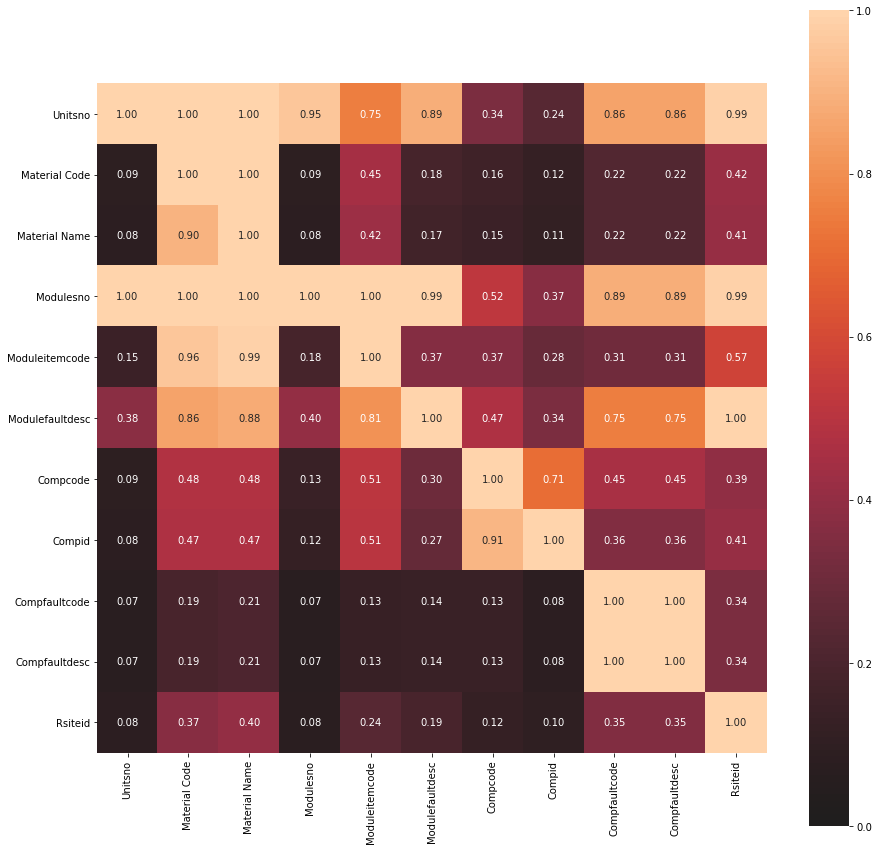

{'corr':                   Unitsno  Material Code  Material Name  Modulesno  \
 Unitsno          1.000000       0.999880       1.000000   0.953853   
 Material Code    0.091639       1.000000       1.000000   0.087509   
 Material Name    0.082573       0.900959       1.000000   0.078846   
 Modulesno        0.998795       0.999801       0.999856   1.000000   
 Moduleitemcode   0.145329       0.955570       0.991552   0.184451   
 Modulefaultdesc  0.377711       0.855603       0.876459   0.404840   
 Compcode         0.091958       0.478064       0.481220   0.133621   
 Compid           0.081178       0.470368       0.468840   0.123300   
 Compfaultcode    0.067648       0.193285       0.209156   0.066857   
 Compfaultdesc    0.067648       0.193285       0.209156   0.066857   
 Rsiteid          0.080175       0.369430       0.401223   0.076719   
 
                  Moduleitemcode  Modulefaultdesc  Compcode    Compid  \
 Unitsno                0.750151         0.886552  0.342021  0.23

In [22]:
# Calculate the correlation/strength-of-association of features in data-set
# with categorical features using:
# Cramer's V or Theil's U for categorical-categorical cases

associations(df_RCTool_categorical, nom_nom_assoc='theil', figsize=(15, 15), cmap=None, cbar=True)

In [40]:
# Calculate the correlation/strength-of-association of features in data-set
# with categorical features using:
# Cramer's V or Theil's U for categorical-categorical cases
        
associations(df_RCTool_categorical, nom_nom_assoc='cramer', figsize=(15, 15), cmap=None, cbar=True)

MemoryError: Unable to allocate 13.0 GiB for an array with shape (33379, 52253) and data type float64

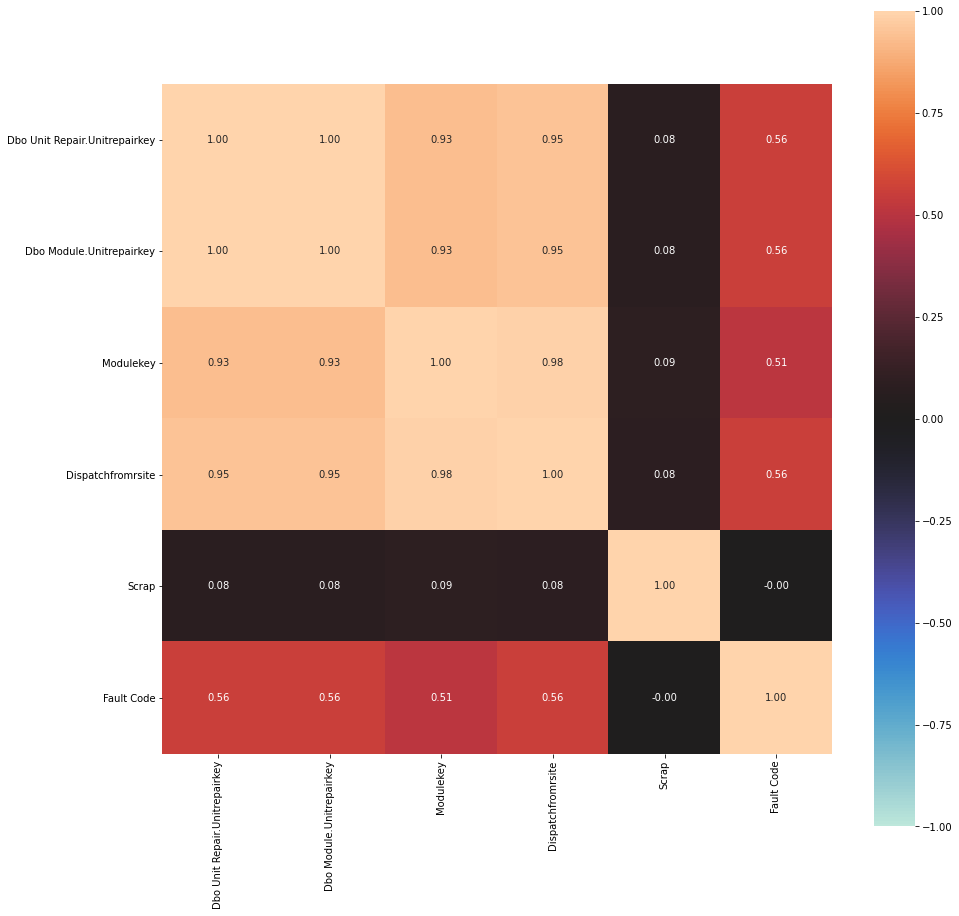

{'corr':                                Dbo Unit Repair.Unitrepairkey  \
 Dbo Unit Repair.Unitrepairkey                       1.000000   
 Dbo Module.Unitrepairkey                            1.000000   
 Modulekey                                           0.931251   
 Dispatchfromrsite                                   0.951328   
 Scrap                                               0.077219   
 Fault Code                                          0.555210   
 
                                Dbo Module.Unitrepairkey  Modulekey  \
 Dbo Unit Repair.Unitrepairkey                  1.000000   0.931251   
 Dbo Module.Unitrepairkey                       1.000000   0.931251   
 Modulekey                                      0.931251   1.000000   
 Dispatchfromrsite                              0.951328   0.984916   
 Scrap                                          0.077219   0.089023   
 Fault Code                                     0.555210   0.508085   
 
                                Disp

In [24]:
# Calculate the correlation/strength-of-association of features in data-set
# with continuous features using:
# Pearson's R for continuous-continuous cases

associations(df_RCTool_numerical, nom_nom_assoc='pearson', figsize=(15, 15), cmap=None, cbar=True)

### 4. Build Seaborn scatter plots

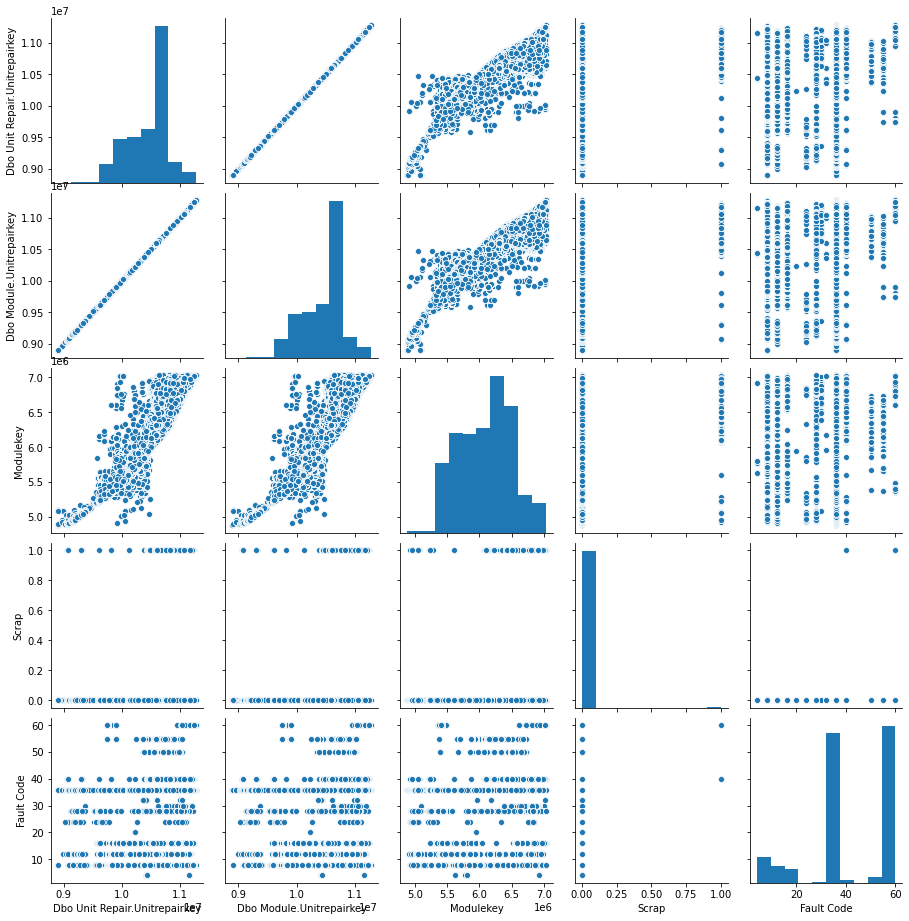

In [25]:
import seaborn as sns
sns.pairplot(df_RCTool)

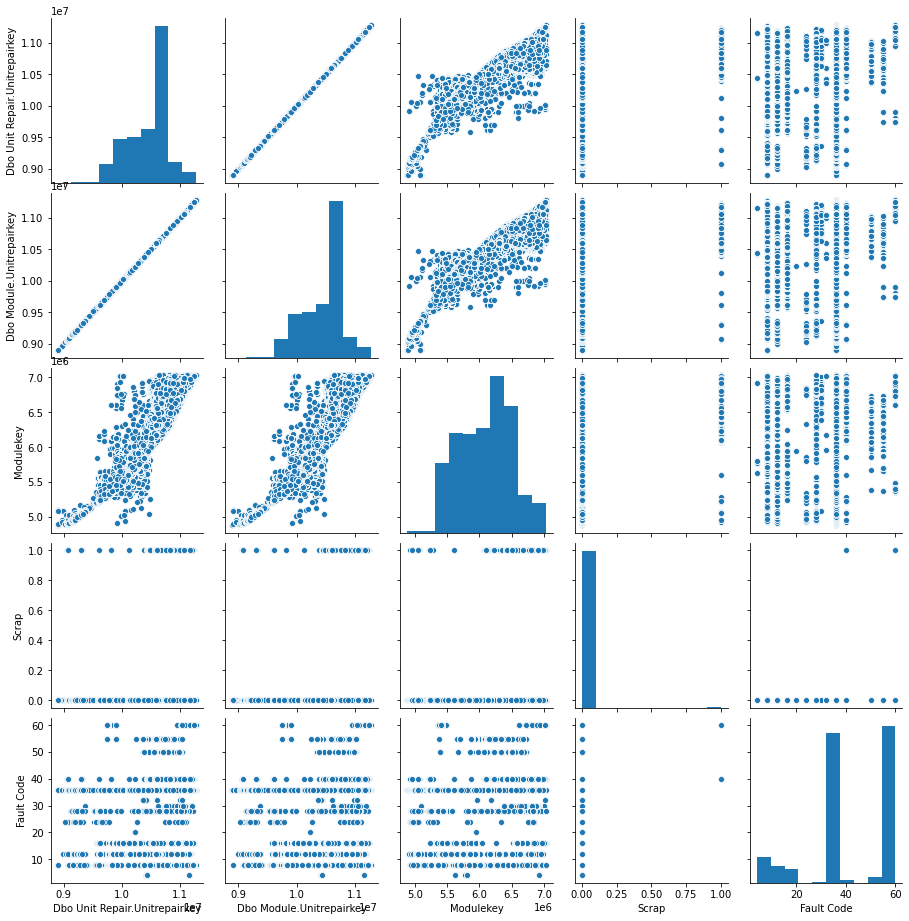

In [26]:
sns.pairplot(df_RCTool_numerical)

### 5. Build Matplotlib boxplots

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
numeric_features = ['Dbo Unit Repair.Unitrepairkey', 'Dbo Module.Unitrepairkey',
 'Modulekey', 'Scrap', 'Fault Code']

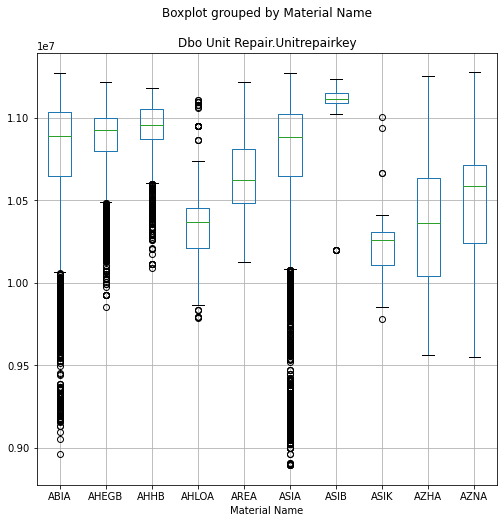

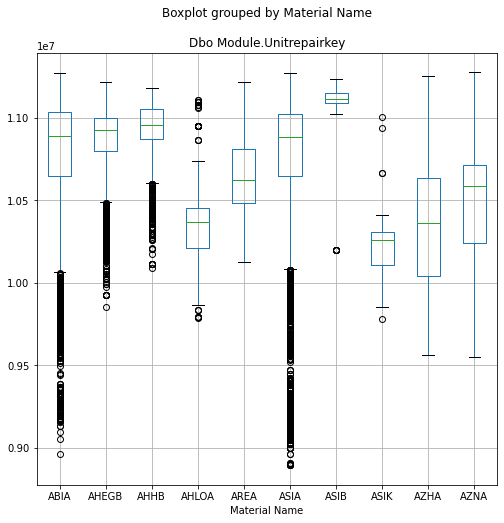

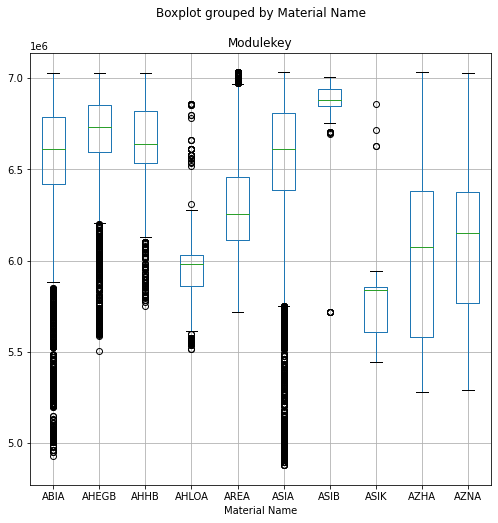

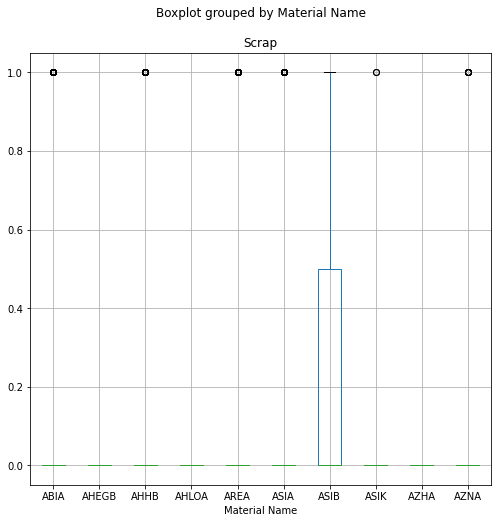

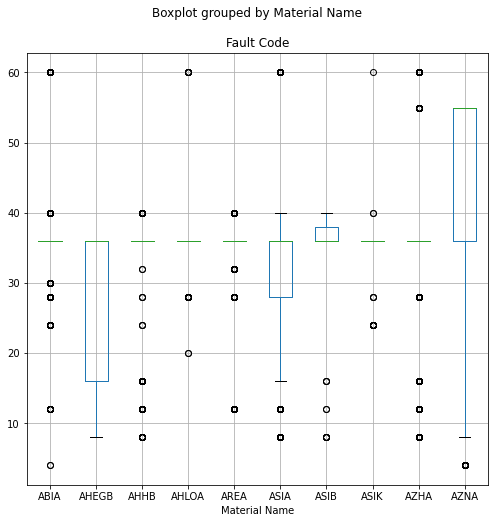

In [35]:
for col in numeric_features:
    df_RCTool.boxplot(column=col, by='Material Name', figsize=(8,8))

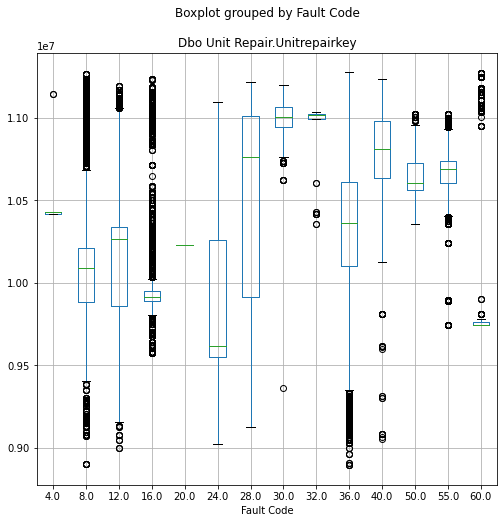

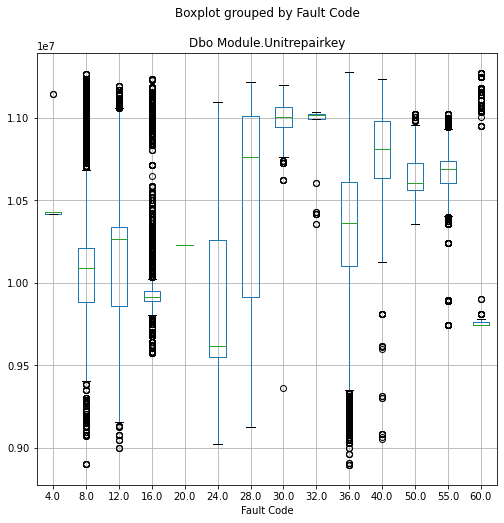

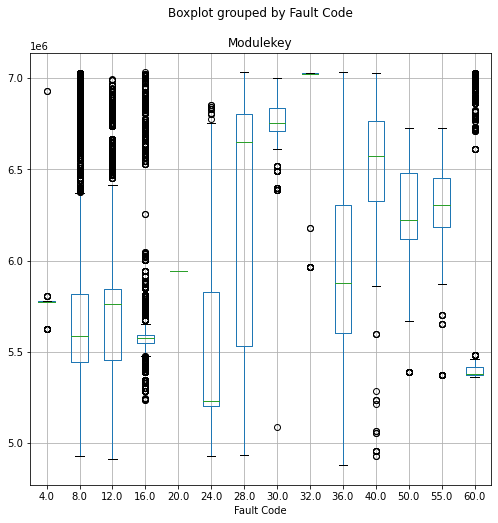

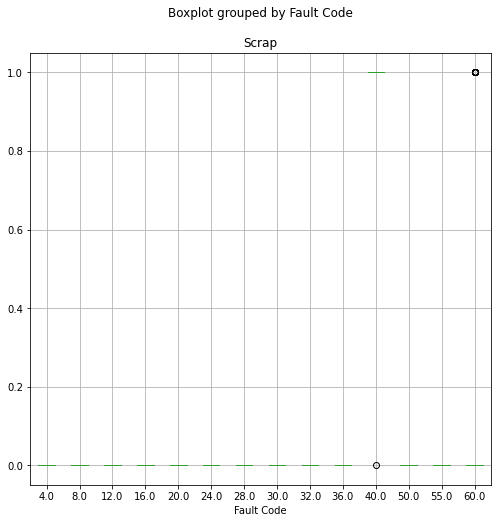

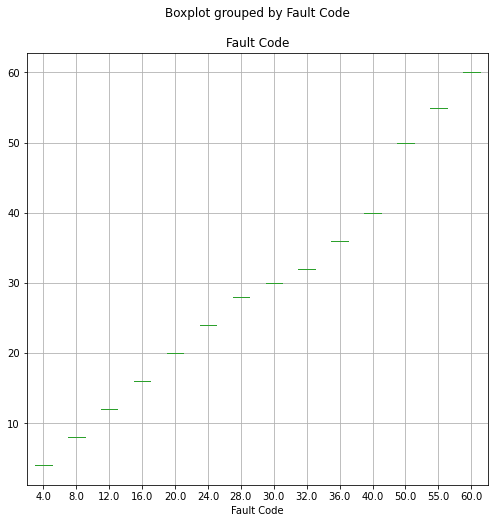

In [36]:
for col in numeric_features:
    df_RCTool.boxplot(column=col, by='Fault Code', figsize=(8,8))

### 6. Statistical parameters for dataframe

In [37]:
df_RCTool.corr()

,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Modulekey,Scrap,Fault Code
Dbo Unit Repair.Unitrepairkey,1.000000,1.000000,0.931251,0.077219,0.555210
Dbo Module.Unitrepairkey,1.000000,1.000000,0.931251,0.077219,0.555210
Modulekey,0.931251,0.931251,1.000000,0.089023,0.508085
Scrap,0.077219,0.077219,0.089023,1.000000,-0.002397
Fault Code,0.555210,0.555210,0.508085,-0.002397,1.000000


In [38]:
df_RCTool.corr().style.background_gradient(cmap=None, axis=None)

,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Modulekey,Scrap,Fault Code
Dbo Unit Repair.Unitrepairkey,1.000000,1.000000,0.931251,0.077219,0.555210
Dbo Module.Unitrepairkey,1.000000,1.000000,0.931251,0.077219,0.555210
Modulekey,0.931251,0.931251,1.000000,0.089023,0.508085
Scrap,0.077219,0.077219,0.089023,1.000000,-0.002397
Fault Code,0.555210,0.555210,0.508085,-0.002397,1.000000


In [39]:
df_RCTool.describe()

,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Modulekey,Scrap,Fault Code
count,3.823690e+05,3.823690e+05,3.823690e+05,382369.000000,382369.000000
mean,1.046340e+07,1.046340e+07,6.097740e+06,0.006470,40.532507
std,3.528614e+05,3.528614e+05,4.134681e+05,0.080177,15.206312
min,8.895403e+06,8.895403e+06,4.878595e+06,0.000000,4.000000
25%,1.021996e+07,1.021996e+07,5.767616e+06,0.000000,36.000000
50%,1.057648e+07,1.057648e+07,6.153145e+06,0.000000,36.000000
75%,1.071982e+07,1.071982e+07,6.405797e+06,0.000000,55.000000
max,1.127569e+07,1.127569e+07,7.030564e+06,1.000000,60.000000
